# Support Vector Classifier

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import svm, linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
%matplotlib inline

In [4]:
# new dataset, handwritten digits!
digits = datasets.load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [5]:
print(digits.data.shape)

(1797, 64)


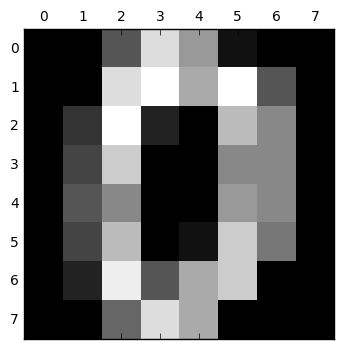

In [9]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [10]:
len(digits.data)      # 1,797 observations

1797

In [14]:
len(digits.data[0])   # 8 x 8 pixel image

64

In [22]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
len(digits.target)

1797

In [25]:
digits.target[9]
# 9

9

In [26]:
digits_X, digits_y = digits.data, digits.target

## SVMs - Support Vector Classifier

Manual page for scikit-learn SVC: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

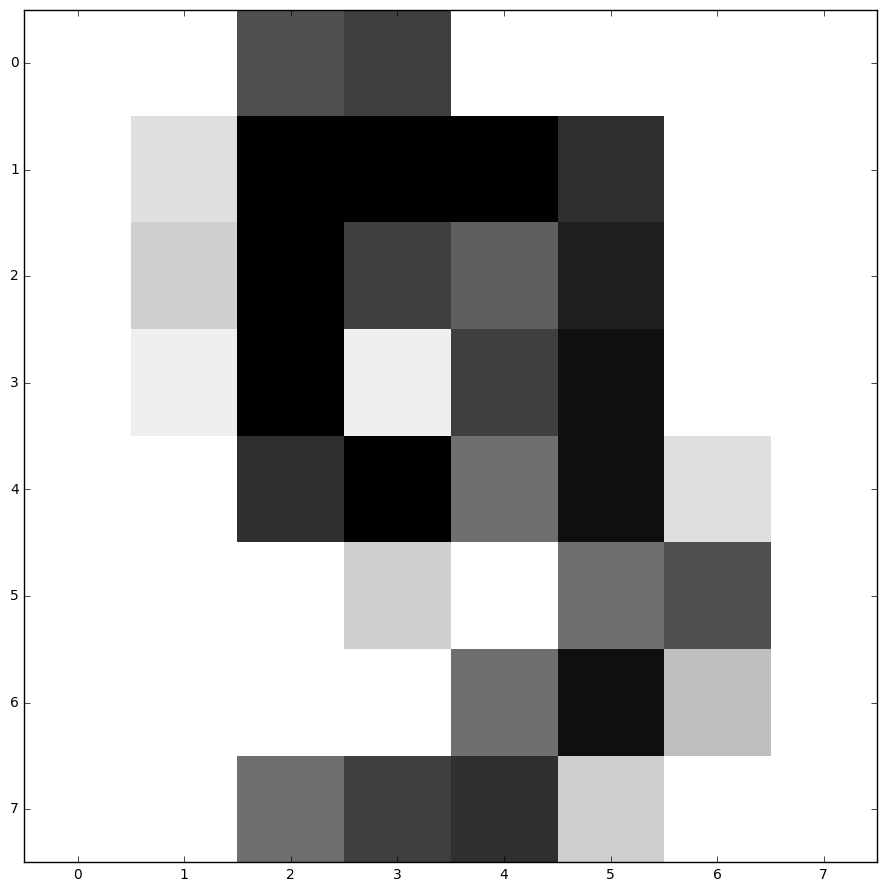

In [65]:
# Let's try a SVM classifier
clf = svm.SVC()
clf.fit(digits_X, digits_y)
plt.imshow(digits.images[9], cmap=plt.cm.gray_r, interpolation='nearest')

In [66]:
clf.predict(digits.data[-5])
# WOOHOO

C:\Users\Natsheh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([9])

In [32]:
cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

# OOF again, we lost to the logistic regression...
# This estimator defaults to the Gaussian (aka radial basis function)
# let's try something else

0.44878680061604637

### Guassian has two parameters, gamma and C

Intuitively, the gamma parameter defines how far the influence of a 
single training example reaches, with low values meaning ‘far’ and 
high values meaning ‘close’. 

* small gamma: The model is constrained, can under-fit!
* big gamma: Tries to capture the shape too well: can over-fit!


* small C: Makes the decision surface smooth and simple, can under-fit!
* big C: Selects more support vectors: can over-fit!


In [33]:
# note the scale of gamma and C
clf = svm.SVC(gamma=0.001, C=1)
cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

# Skadoosh!


0.9716361987950688

In [67]:
# import some data to play with
iris = datasets.load_iris()
iris_X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
iris_y = iris.target

In [41]:
# Start with logistic Regression
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, iris_X, iris_y, cv=5, scoring='accuracy').mean()

0.76666666666666672

In [42]:
# Let's try a SVM
clf = svm.SVC()
cross_val_score(clf, iris_X, iris_y, cv=5, scoring='accuracy').mean()

0.81999999999999995

### Let's compare three SVMs with different kernels

* Radial Bias Function (RBF)
* Linear
* Poly of degree 3

In [78]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(iris_X, iris_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(iris_X, iris_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(iris_X, iris_y)

In [79]:
# create a mesh to plot in
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

In [80]:
# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

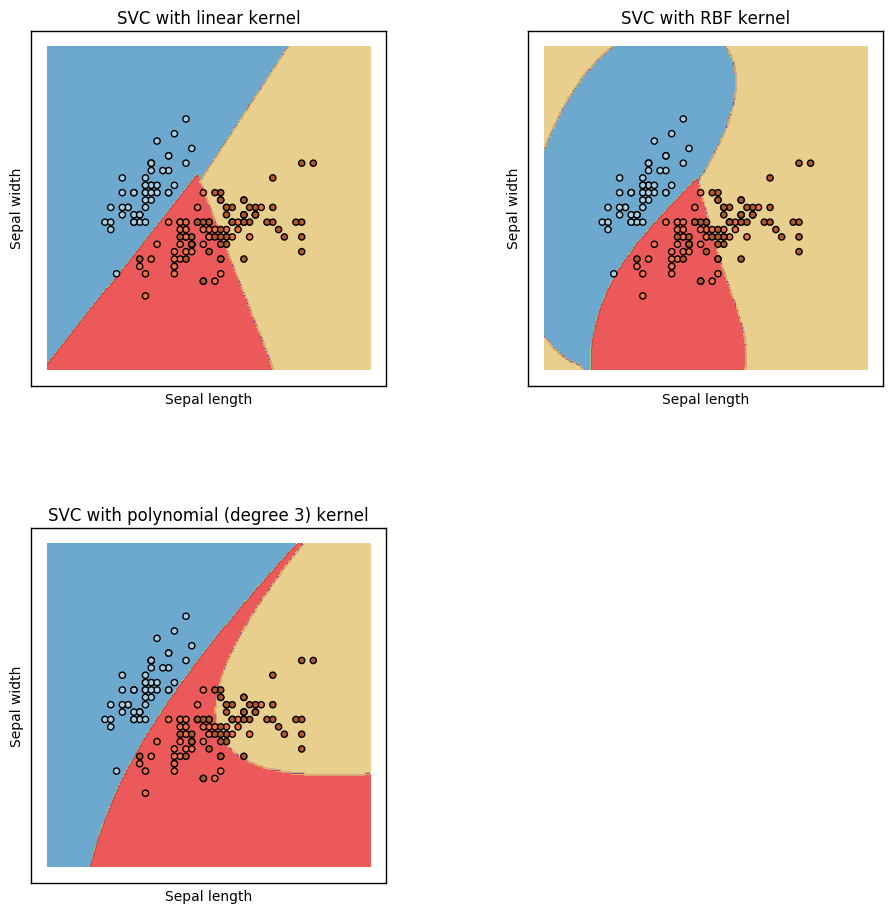

In [81]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 11  # set plot size

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

In [49]:
print('SVC with linear kernel score: ',cross_val_score(svc, iris_X, iris_y, cv=10, scoring='accuracy').mean())
print('SVC with RBF kernel score: ',cross_val_score(rbf_svc, iris_X, iris_y, cv=10, scoring='accuracy').mean())
print('SVC with polynomial (degree 3) kernel score: ',cross_val_score(poly_svc, iris_X, iris_y, cv=10, scoring='accuracy').mean())

SVC with linear kernel score:  0.813333333333
SVC with RBF kernel score:  0.806666666667
SVC with polynomial (degree 3) kernel score:  0.8


### Lets try SVC on some different data

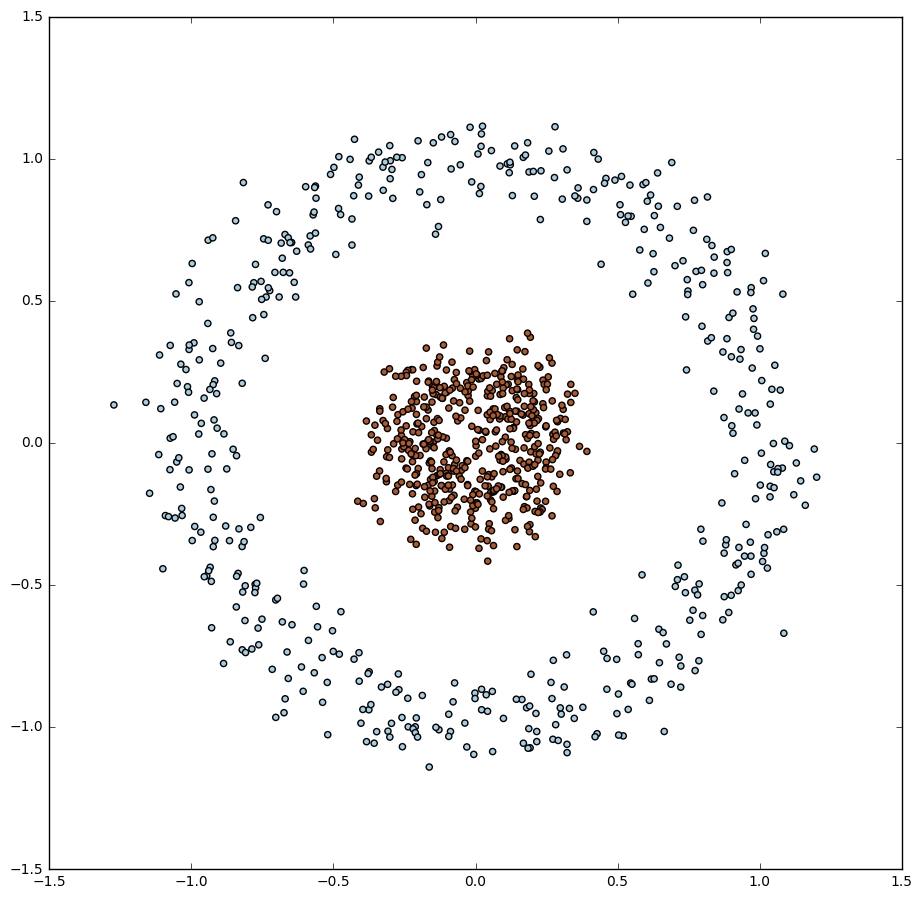

In [50]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
cm = cmap=plt.cm.Paired
plt.scatter(circles_X[:,0], circles_X[:,1], c=circles_y, cmap=cm)

In [51]:
circles_y

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0,

In [53]:
from sklearn.linear_model import LogisticRegression
# let's predict them without graphs
logreg = LogisticRegression()
cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()


0.48899999999999999

In [54]:
clf = svm.SVC(kernel = 'linear')        # I like lines
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()


0.65200000000000002

In [55]:
clf = svm.SVC(kernel = 'poly', degree = 3)        # I like 3rd degree polys
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()

0.56699999999999995

In [56]:
clf = svm.SVC(kernel = 'rbf')           # I like circles
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()


1.0

#### The radial basis function kernel projects the data into higher dimensions that accompany circles well

OK now with graphs


In [57]:
logreg.fit(circles_X, circles_y)
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(circles_X, circles_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(circles_X, circles_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(circles_X, circles_y)

In [58]:
# create a mesh to plot in
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

In [59]:
# title for the plots
titles = ['Logistic Regression ',
          'SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel']

Logistic Regression score:  0.489
SVC with linear kernel score:  0.652
SVC with polynomial (degree 3) kernel score:  0.567
SVC with RBF kernel score:  1.0


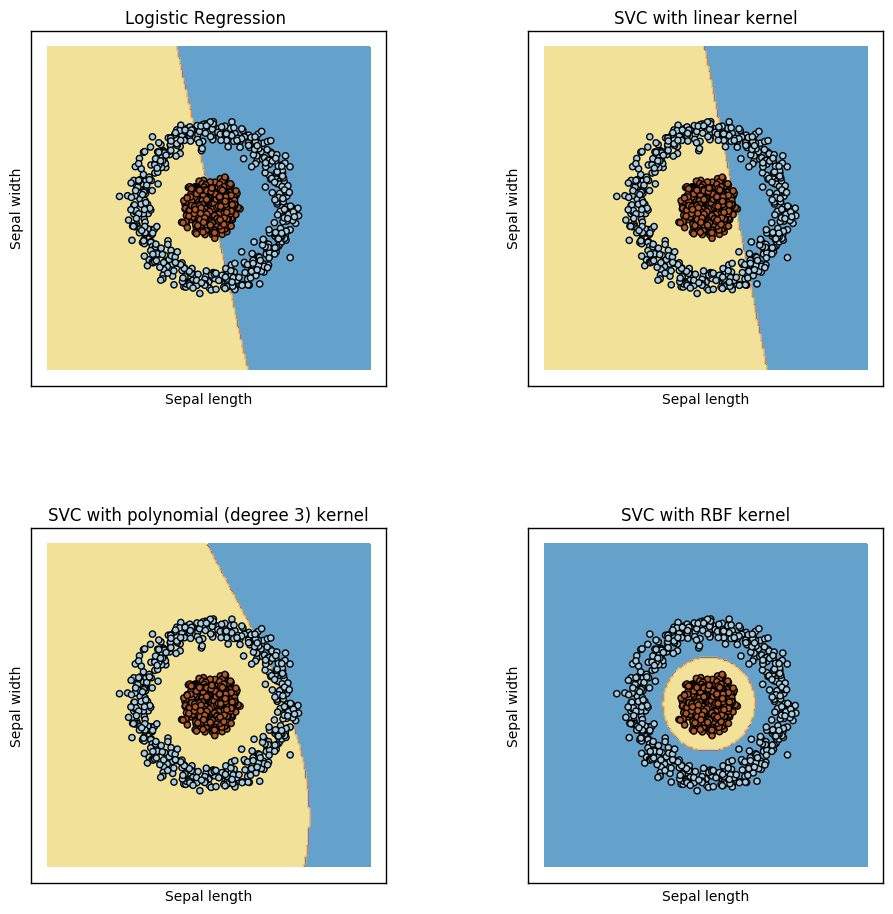

In [61]:
print('Logistic Regression score: ',cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()) 
print('SVC with linear kernel score: ',cross_val_score(svc, circles_X, circles_y, cv=5, scoring='accuracy').mean()) 
print('SVC with polynomial (degree 3) kernel score: ',cross_val_score(poly_svc, circles_X, circles_y, cv=5, scoring='accuracy').mean()) 
print('SVC with RBF kernel score: ',cross_val_score(rbf_svc, circles_X, circles_y, cv=5, scoring='accuracy').mean()) 


for i, clf in enumerate((logreg, svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

#### a real thing of beauty

<pr>
### Bonus: Visualize C

Intuitively, the gamma parameter defines how far the influence of a 
single training example reaches, with low values meaning ‘far’ and 
high values meaning ‘close’. 

* small gamma: The model is constrained, can under-fit!
* big gamma: Tries to capture the shape too well: can over-fit!


* small C: Makes the decision surface smooth and simple, can under-fit!
* big C: Selects more support vectors: can over-fit!


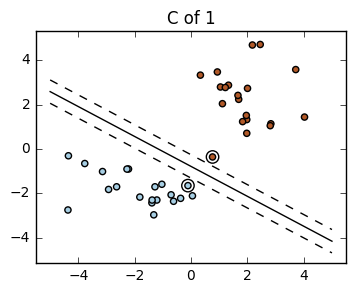

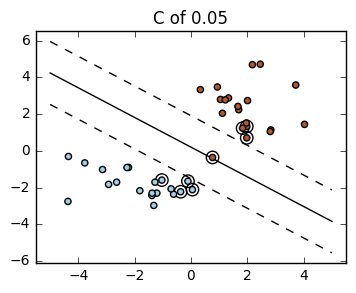

In [62]:
# Visualizing different C

X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('C of 1', 1), ('C of 0.05', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    plt.title(name)

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    fignum = fignum + 1

plt.show()


* small C: can under-fit!
* big C: can over-fit!
